In [148]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [149]:
from google.colab import drive

drive.mount('/content/drive/')
#cols = ['productId','productTitle','merchantId','clusterId','clusterLabel','categoryId', 'categoryLabel']
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lab 3/data.csv')
#dataset.columns = cols
dataset.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


# В данном датасете представленны следующие данные

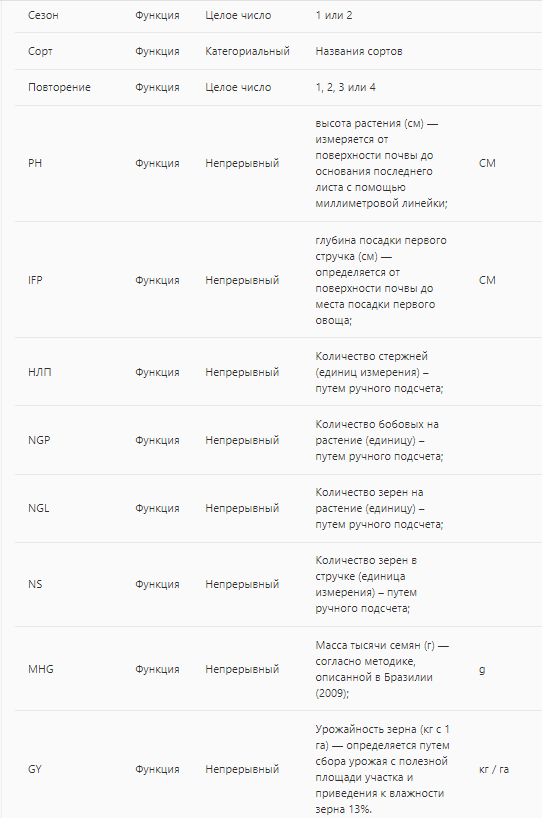


In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [151]:
#размер датасета
dataset.shape

(320, 11)

In [152]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [153]:
dataset.describe()

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


In [154]:
dataset['Cultivar'].unique()

array(['NEO 760 CE', 'MANU IPRO', '77HO111I2X - GUAPORÉ', 'NK 7777 IPRO',
       'GNS7900 IPRO - AMPLA', 'LTT 7901 IPRO', 'BRASMAX BÔNUS IPRO',
       '97Y97 IPRO', 'BRASMAX OLIMPO IPRO', 'LYNDA IPRO', 'NK 8100 IPRO',
       '82HO111 IPRO - HO COXIM IPRO', '83IX84RSF I2X',
       'ADAPTA LTT 8402 IPRO', '98R30 CE', 'FORTALEZA IPRO',
       'MONSOY 8330I2X', 'SUZY IPRO', 'TMG 22X83I2X',
       'EXPANDE LTT 8301 IPRO', 'FORTALECE L090183 RR', '96R29 IPRO',
       '74K75RSF CE', 'FTR 3868 IPRO', 'GNS7700 IPRO', 'ELISA IPRO',
       '79I81RSF IPRO', 'NEO 790 IPRO', 'PAULA IPRO', 'FTR 3179 IPRO',
       'LAT 1330BT', 'FTR 4280 IPRO', 'ATAQUE I2X', 'SYN2282IPRO',
       '82I78RSF IPRO', 'M 8644 IPRO', 'MONSOY M8606I2X', 'NK 8770 IPRO',
       'FTR 4288 IPRO', 'FTR 3190 IPRO'], dtype=object)

In [155]:
# Теперь проверим количество строк, которое принадлежит каждому классу:
dataset['Cultivar'].value_counts()

,count
Cultivar,
NEO 760 CE,8
MANU IPRO,8
74K75RSF CE,8
FTR 3868 IPRO,8
GNS7700 IPRO,8
ELISA IPRO,8
79I81RSF IPRO,8
NEO 790 IPRO,8
PAULA IPRO,8


# Визуализация

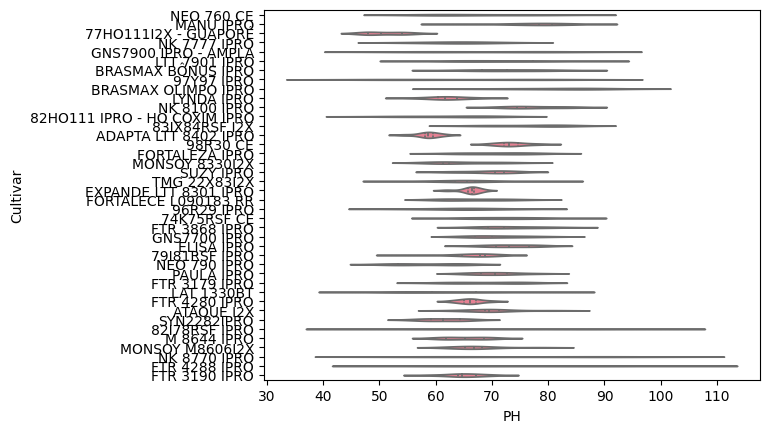

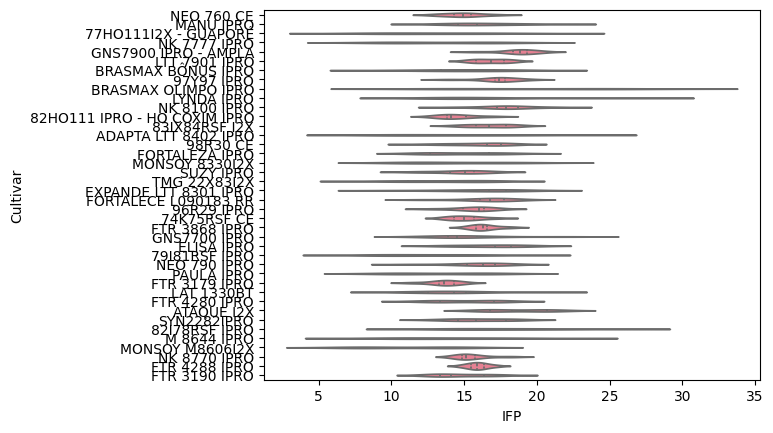

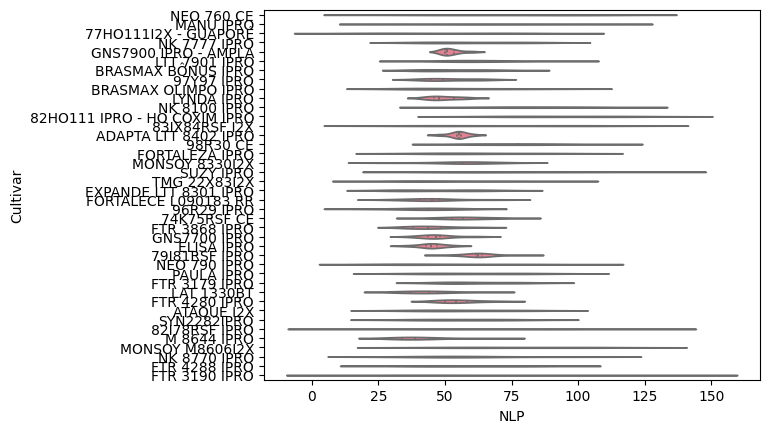

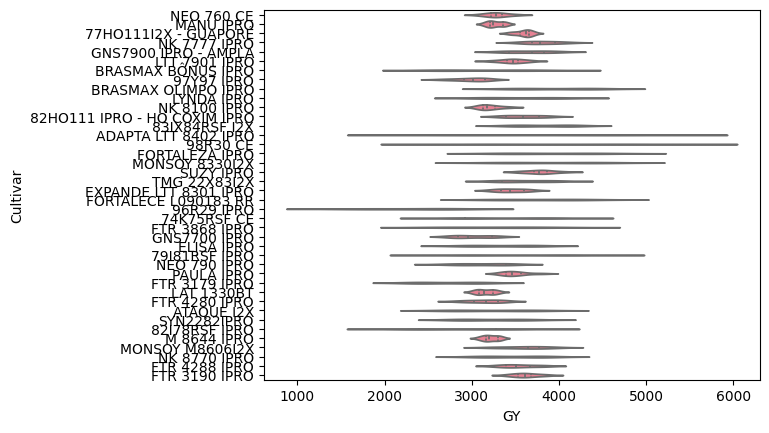

In [11]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

sns.violinplot(y='Cultivar', x='PH', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Cultivar', x='IFP', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Cultivar', x='NLP', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Cultivar', x='GY', data=dataset, inner='quartile')
plt.show()

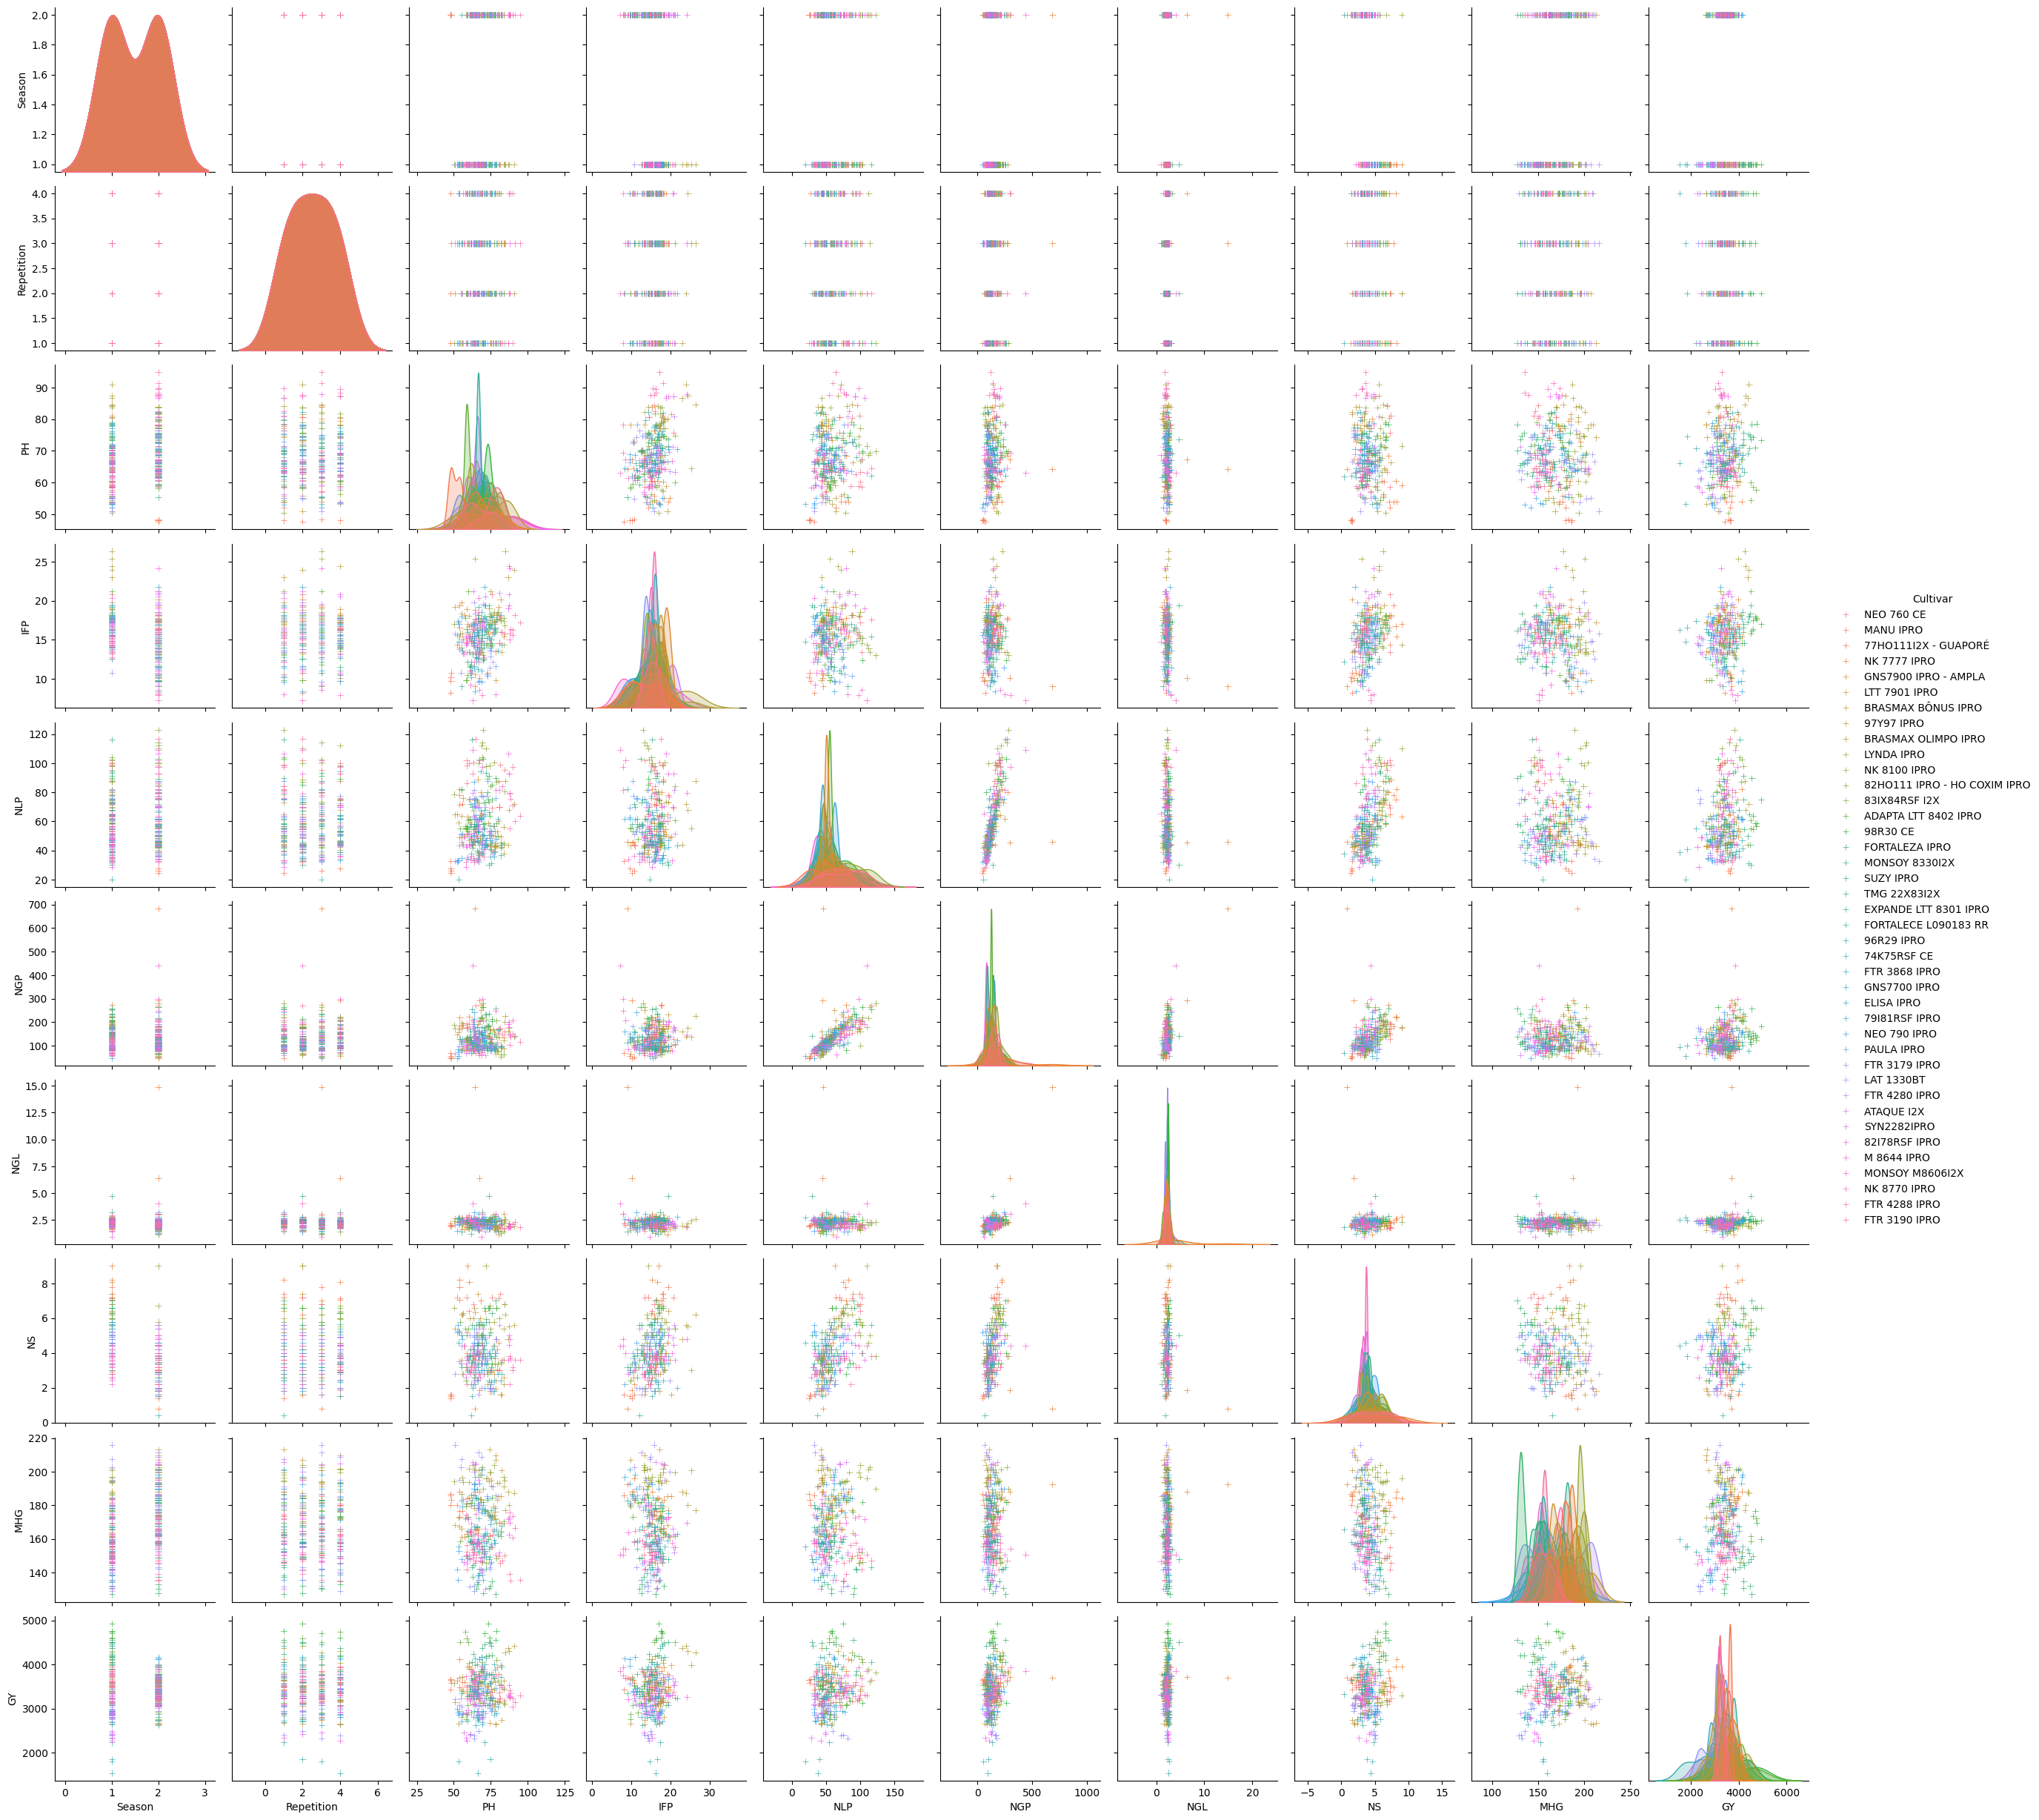

In [10]:
sns.pairplot(dataset, hue='Cultivar', markers='+')
plt.show()

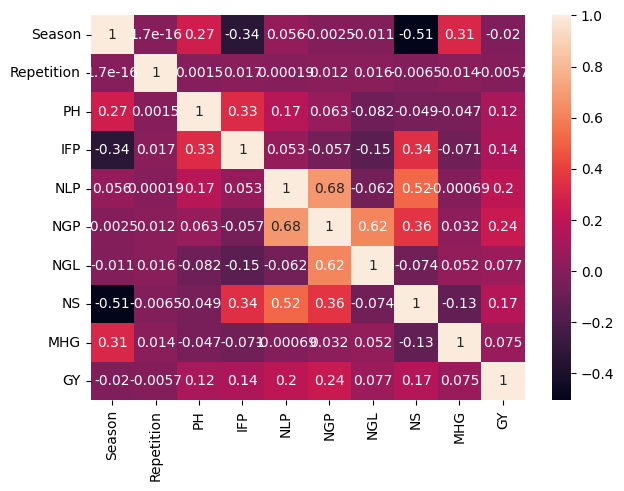

In [156]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

In [157]:
from sklearn.preprocessing import LabelEncoder

# Применение Label Encoding к категориальным данным
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

dataset.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,31,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,31,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,31,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,31,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,28,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [158]:
for column, le in label_encoders.items():
    print(f"Column: {column}")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

Column: Cultivar
{'74K75RSF CE': 0, '77HO111I2X - GUAPORÉ': 1, '79I81RSF IPRO': 2, '82HO111 IPRO - HO COXIM IPRO': 3, '82I78RSF IPRO': 4, '83IX84RSF I2X': 5, '96R29 IPRO': 6, '97Y97 IPRO': 7, '98R30 CE': 8, 'ADAPTA LTT 8402 IPRO': 9, 'ATAQUE I2X': 10, 'BRASMAX BÔNUS IPRO': 11, 'BRASMAX OLIMPO IPRO': 12, 'ELISA IPRO': 13, 'EXPANDE LTT 8301 IPRO': 14, 'FORTALECE L090183 RR': 15, 'FORTALEZA IPRO': 16, 'FTR 3179 IPRO': 17, 'FTR 3190 IPRO': 18, 'FTR 3868 IPRO': 19, 'FTR 4280 IPRO': 20, 'FTR 4288 IPRO': 21, 'GNS7700 IPRO': 22, 'GNS7900 IPRO - AMPLA': 23, 'LAT 1330BT': 24, 'LTT 7901 IPRO': 25, 'LYNDA IPRO': 26, 'M 8644 IPRO': 27, 'MANU IPRO': 28, 'MONSOY 8330I2X': 29, 'MONSOY M8606I2X': 30, 'NEO 760 CE': 31, 'NEO 790 IPRO': 32, 'NK 7777 IPRO': 33, 'NK 8100 IPRO': 34, 'NK 8770 IPRO': 35, 'PAULA IPRO': 36, 'SUZY IPRO': 37, 'SYN2282IPRO': 38, 'TMG 22X83I2X': 39}


In [159]:
X = dataset.drop(['GY'], axis=1)
y = dataset['GY']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (320, 10) | y shape: (320,) 


In [160]:
import scipy.stats as stats


# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.4787596723909074, pvalue=0.6324386246248701, df=318.0)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.5749179397746796, pvalue=0.5657533167618298, df=318.0)

In [162]:
from sklearn.utils import resample

# Преобразуем y_train в целые числа, если необходимо
y_train = y_train.astype(int)

# Проверим количество образцов в каждом классе
class_counts = y_train.value_counts()
print("Class distribution before resampling:")
print(class_counts)

# Увеличим количество образцов для классов с менее чем 2 образцами, если это необходимо
if class_counts.min() < 2:
    df = pd.concat([X_train, y_train], axis=1)
    for cls in class_counts[class_counts < 2].index:
        df_minority = df[df.iloc[:, -1] == cls]
        df_majority = df[df.iloc[:, -1] != cls]
        df_minority_upsampled = resample(df_minority,
                                         replace=True,    # sample with replacement
                                         n_samples=2,     # to match majority class
                                         random_state=1)  # reproducible results
        df = pd.concat([df_majority, df_minority_upsampled])
    X_train = df.iloc[:, :-1]
    y_train = df.iloc[:, -1]
    y_train = y_train.astype(int)  # Преобразуем обратно в целые числа, если необходимо

# Проверим количество образцов после ресэмплинга
class_counts = y_train.value_counts()
print("Class distribution after resampling:")
print(class_counts)

# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))  # Увеличиваем количество итераций
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
    for i in range(2, 20):
        try:
            kfold = StratifiedKFold(n_splits=i, random_state=1, shuffle=True)
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
            break
        except ValueError as e:
            print(f"Skipping {i} splits for {name} due to error: {e}")
            continue
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Class distribution before resampling:
GY
3783    2
3248    2
3236    2
3207    2
3720    2
       ..
2939    1
2648    1
3132    1
3100    1
2726    1
Name: count, Length: 240, dtype: int64
Class distribution after resampling:
GY
3182    2
3248    2
2765    2
2878    2
4098    2
       ..
3120    2
4164    2
3343    2
3599    2
2726    2
Name: count, Length: 240, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.933333 (0.000000)
Skipping 2 splits for LDA due to error: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 597, in fit
    raise ValueError(
ValueError: The number of samples must be more than the number of classes.

Skipping 3 splits for LDA due to error: n_splits=3 cannot be greater than the number of member

In [120]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# Преобразуем y_train в целые числа, если необходимо
y_train = y_train.astype(int)

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  for i in range(2, 20):
    try:
      kfold = StratifiedKFold(n_splits=i, random_state=1, shuffle=True)
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
      break
    except:
      continue
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
KNN: 0.000000 (0.000000)
CART: 0.000000 (0.000000)
NB: 0.000000 (0.000000)
SVC: 0.000000 (0.000000)


In [173]:
# Инициализируем и обучаем модель KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе данных
knn_pred_res = knn.predict(X_test)
y_test = y_test.astype(int)
# Оцениваем точность модели
knn_accuracy = accuracy_score(y_test, knn_pred_res)

# Для получения аналогичных "трансформированных признаков", как в случае с LDA, используем predict_proba
knn_transformed = knn.predict_proba(X_train)

# Выводим результаты
print(f'KNN accuracy: {knn_accuracy}')
print(f'KNN prediction: {knn_pred_res}')
print('KNN transformed features (probabilities):', knn_transformed[:5].T, sep='\n')

KNN accuracy: 0.0
KNN prediction: [3939 3048 2866 2859 3369 3391 2796 3454 3312 3266 3655 2804 3400 2733
 3439 2493 3019 2934 2888 3523 2331 2691 2765 3038 3132 3539 3277 4425
 3560 2401 2951 3560 2640 2947 4453 3300 3584 3746 3193 2925 3120 3193
 3716 2691 3128 2958 3350 3487 3241 3560 3356 3508 3623 3142 3437 3505
 3402 3488 3348 3596 4120 3230 2765 2860]
KNN transformed features (probabilities):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


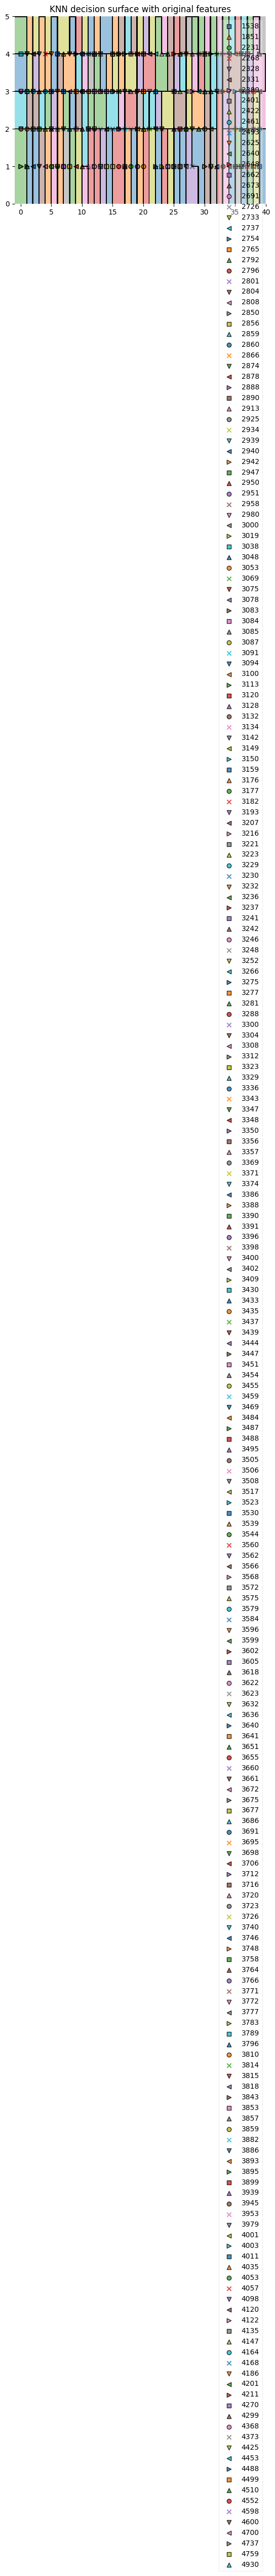

In [175]:
from mlxtend.plotting import plot_decision_regions

# Предполагаем, что y_train и X_train уже существуют
# Для этого примера X_train и y_train должны быть заранее подготовлены

# Преобразуем X_train для 2 признаков
X_2d = X_train[['Cultivar', 'Repetition']].values
y_2d = y_train.values

# Инициализируем и обучаем модель KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_2d, y_2d)

# Визуализируем регионы принятия решений
plt.title('KNN decision surface with original features')
plot_decision_regions(
    X=X_2d,
    y=y_2d,
    clf=knn
)

# Отображаем график
plt.show()